Benchmark All models

In [1]:
from coconut_inference import coconut_inference
import time


def test_time(coconut):
    start = time.time()
    rs = coconut.inference(image_path=test_image_path, num_of_perdict=5)
    end = time.time()
    print('inference took %.4fs' % (end - start))
    
nsfw_models = {}
# NSFW Model File Path
# v1
nsfw_models['nsfw_mobilenet'] = coconut_inference(model_checkpoint_file_path='checkpoints/nsfw_mobilenet_sgd.pth_best.pth')
nsfw_models['nsfw_resnet50_sgd'] = coconut_inference(model_checkpoint_file_path='checkpoints/nsfw_resnet50_sgd.pth_best.pth')
nsfw_models['nsfw_resnet101_sgd'] = coconut_inference(model_checkpoint_file_path='checkpoints/nsfw_resnet101_sgd.pth_best.pth')
nsfw_models['nsfw_resnet101_adabound'] = coconut_inference(model_checkpoint_file_path='checkpoints/nsfw_resnet101_adabound.pth_best.pth')
# v2
nsfw_models['nsfw_resnet101_sgd_v2'] = coconut_inference(model_checkpoint_file_path='checkpoints/nsfw_resnet101_sgd_v2.pth_best.pth')
# v3
nsfw_models['nsfw_resnet101_sgd_v3'] = coconut_inference(model_checkpoint_file_path='checkpoints/nsfw_resnet101_sgd_v3.pth_best.pth')

food179_models = {}
# Food179 Model File Path
# v1
food179_models['food179_mobilenet_sgd'] = coconut_inference(model_checkpoint_file_path='checkpoints/food179_mobilenet_sgd.pth_best.pth')
food179_models['food179_resnet50_sgd'] = coconut_inference(model_checkpoint_file_path='checkpoints/food179_resnet50_sgd.pth_best.pth')
food179_models['food179_resnet101_sgd'] = coconut_inference(model_checkpoint_file_path='checkpoints/food179_resnet101_sgd.pth_best.pth')
food179_models['food179_resnet101_adabound'] = coconut_inference(model_checkpoint_file_path='checkpoints/food179_resnet101_adabound.pth_best.pth')
# v3
food179_models['food179_resnet101_sgd_v3'] = coconut_inference(model_checkpoint_file_path='checkpoints/food179_resnet101_sgd_v3.pth_best.pth')

test_image_path = '/Users/hanxunhuang/Desktop/UniMelb/2019-semester1/COMP90024-Cluster-and-Cloud-Computing/project/project2/COMP90024-2019S1-Team7/machine_learning/GalGadot_Fast7.jpg'

print('=' * 20 + 'NSFW' + '=' * 20)
for key in nsfw_models:
    print(key)
    test_time(nsfw_models[key])
    print(nsfw_models[key].print_model_details())

print('=' * 20 + 'FOOD179' + '=' * 20)
for key in food179_models:
    print(key)
    test_time(food179_models[key])
    print(food179_models[key].print_model_details())

building MobileNetV2
building resnet50
building resnet101
building resnet101
building resnet101
building resnet101
building MobileNetV2
building resnet50
building resnet101
building resnet101
building resnet101
====================NSFW====================
nsfw_mobilenet
inference took 0.1710s
model_arc: mobilenet
model_type: nsfw
train_optimizer: sgd
test_acc: 0.8760	best_acc: 0.8760	test_acc_top5: 1.0000

nsfw_resnet50_sgd
inference took 0.3113s
model_arc: resnet50
model_type: nsfw
train_optimizer: sgd
test_acc: 0.8759	best_acc: 0.8759	test_acc_top5: 1.0000

nsfw_resnet101_sgd
inference took 0.5624s
model_arc: resnet101
model_type: nsfw
train_optimizer: sgd
test_acc: 0.8823	best_acc: 0.8823	test_acc_top5: 1.0000

nsfw_resnet101_adabound
inference took 0.6114s
model_arc: resnet101
model_type: nsfw
train_optimizer: adabound
test_acc: 0.8774	best_acc: 0.8774	test_acc_top5: 1.0000

nsfw_resnet101_sgd_v2
inference took 0.5334s
model_arc: resnet101
model_type: nsfw
train_optimizer: sgd
test

[('sexy', 0.9999901056289673, 4), ('porn', 9.189222510030959e-06, 3), ('neutral', 6.740341405020445e-07, 2), ('hentai', 1.6191332719017737e-08, 1), ('drawings', 1.0942947881176224e-08, 0)]
[('non_food', 0.994848906993866, 107), ('grilled_salmon', 0.0002143400488421321, 80), ('scallops', 0.00020104798022657633, 147), ('gnocchi', 0.00019903703650925308, 72), ('risotto', 0.00019538025662768632, 135)]


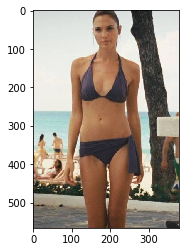

In [2]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
%matplotlib inline

test_image_path = '/Users/hanxunhuang/Desktop/UniMelb/2019-semester1/COMP90024-Cluster-and-Cloud-Computing/project/project2/COMP90024-2019S1-Team7/machine_learning/GalGadot_Fast7.jpg'

# Show Image
img = mpimg.imread(test_image_path)
plt.imshow(img)
print(nsfw_models['nsfw_resnet101_sgd_v3'].inference(image_path=test_image_path, num_of_perdict=5))
print(food179_models['food179_resnet101_sgd_v3'].inference(image_path=test_image_path, num_of_perdict=5))


Benchmark on Real Tweets

In [3]:
import json
normal_tweets_json_file_path = '/Users/hanxunhuang/Desktop/UniMelb/2019-semester1/COMP90024-Cluster-and-Cloud-Computing/project/project2/twitter_data.json'
nsfw_tweets_json_file_path = '/Users/hanxunhuang/Desktop/UniMelb/2019-semester1/COMP90024-Cluster-and-Cloud-Computing/project/project2/GOLDFINGERS_AUS.json'

def nsfw_compare_func(rs):
    if (rs[0][0] == 'porn' or rs[0][0] == 'sexy') and rs[0][1] > 0.7:
        return True
    return False

def food_179_compare_func(rs):
    if rs[0][0] == 'non_food' and rs[0][1] > 0.7:
        return True
    return False

def benchmark_nsfw_tweets(path_file, model, compare_func):
    all_rs_list = []
    selected_rs_list = []
    with open(path_file, 'r') as json_file:
        data = json.load(json_file)
        for tweet_data in data['tweets']:
            for image_url in tweet_data['image_urls']:
                try:
                    rs = model.inference(image_path=image_url, is_url_image=True, num_of_perdict=5)
                    all_rs_list.append((tweet_data['id'], rs))
                    is_select = compare_func(rs)
                    if is_select:
                        selected_rs_list.append((tweet_data['id'], rs))
                except:
                    continue
                    
    all_rs_list_count = len(all_rs_list)
    selected_rs_list_count = len(selected_rs_list)
    ratio = selected_rs_list_count / all_rs_list_count
    return (all_rs_list_count, selected_rs_list_count, ratio)


def benchmark_normal_tweets(path_file, model, compare_func):
    all_rs_list = []
    selected_rs_list = []
    with open(path_file) as json_file:  
        for line in json_file:
            data = json.loads(line[:-2])
            if 'entities' in data and 'media' in data['entities'] :
                for media_data in data['entities']['media']:
                    try:
                        rs = model.inference(image_path=media_data['media_url'], is_url_image=True, num_of_perdict=5)
                        all_rs_list.append((data['id'], rs))
                        if compare_func(rs):
                            selected_rs_list.append((data['id'], rs))
                    except:
                        continue

    all_rs_list_count = len(all_rs_list)
    selected_rs_list_count = len(selected_rs_list)
    ratio = selected_rs_list_count / all_rs_list_count
    return (all_rs_list_count, selected_rs_list_count, ratio)

def benchmark_model(model, compare_func):
    print('-'*20+'Normal Tweets'+'-'*20)
    all_count, select_count, ratio = benchmark_normal_tweets(normal_tweets_json_file_path, model, compare_func)
    print('Tweet count: %d\nSelected count: %d\nratio: %.4f' % (all_count, select_count, ratio))
    
    print('-'*20+'NSFW Tweets'+'-'*20)
    all_count, select_count, ratio = benchmark_nsfw_tweets(nsfw_tweets_json_file_path, model, compare_func)
    print('Tweet count: %d\nSelected count: %d\nratio: %.4f' % (all_count, select_count, ratio))


In [4]:
# Benchmark NSFW V1 V2 V3
# V1
print('-'*20+'nsfw_resnet101_sgd'+'-'*20)
benchmark_model(nsfw_models['nsfw_resnet101_sgd'], nsfw_compare_func)
# V2
print('-'*20+'nsfw_resnet101_sgd_v2'+'-'*20)
benchmark_model(nsfw_models['nsfw_resnet101_sgd_v2'], nsfw_compare_func)
# V3
print('-'*20+'nsfw_resnet101_sgd_v3'+'-'*20)
benchmark_model(nsfw_models['nsfw_resnet101_sgd_v3'], nsfw_compare_func)


--------------------nsfw_resnet101_sgd--------------------
--------------------Normal Tweets--------------------
Tweet count: 757
Selected count: 147
ratio: 0.1942
--------------------NSFW Tweets--------------------
Tweet count: 413
Selected count: 308
ratio: 0.7458
--------------------nsfw_resnet101_sgd_v2--------------------
--------------------Normal Tweets--------------------
Tweet count: 757
Selected count: 54
ratio: 0.0713
--------------------NSFW Tweets--------------------
Tweet count: 413
Selected count: 264
ratio: 0.6392
--------------------nsfw_resnet101_sgd_v3--------------------
--------------------Normal Tweets--------------------
Tweet count: 756
Selected count: 48
ratio: 0.0635
--------------------NSFW Tweets--------------------
Tweet count: 413
Selected count: 352
ratio: 0.8523


In [6]:
# Benchmark FOOD179 V1 V3
# V1
print('-'*20+'food179_resnet101_sgd'+'-'*20)
benchmark_model(food179_models['food179_resnet101_sgd'], food_179_compare_func)

# V3
print('-'*20+'food179_resnet101_sgd_v3'+'-'*20)
benchmark_model(food179_models['food179_resnet101_sgd_v3'], food_179_compare_func)

--------------------food179_resnet101_sgd--------------------
--------------------Normal Tweets--------------------
Tweet count: 757
Selected count: 523
ratio: 0.6909
--------------------NSFW Tweets--------------------
Tweet count: 413
Selected count: 348
ratio: 0.8426
--------------------food179_resnet101_sgd_v3--------------------
--------------------Normal Tweets--------------------
Tweet count: 757
Selected count: 735
ratio: 0.9709
--------------------NSFW Tweets--------------------
Tweet count: 413
Selected count: 412
ratio: 0.9976
